In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import codecs as cd
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss, confusion_matrix
import seaborn as sns

In [2]:
#201801のデータを読み込んでみる
df_f18 = pd.read_csv('ks-projects-201801.csv')
#最初の五行を表示してみる。
display(df_f18.head())

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [3]:
#統計値を表示してみる。
display(df_f18.describe())
#欠損値がある行数を数えてみる。
display(df_f18.isnull().sum())
#各列のデータタイプを確認してみる。
display(df_f18.dtypes)

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,3.786610e+05,3.786610e+05,3.786610e+05,378661.000000,3.748640e+05,3.786610e+05,3.786610e+05
mean,1.074731e+09,4.908079e+04,9.682979e+03,105.617476,7.036729e+03,9.058924e+03,4.545440e+04
std,6.190862e+08,1.183391e+06,9.563601e+04,907.185035,7.863975e+04,9.097334e+04,1.152950e+06
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,5.382635e+08,2.000000e+03,3.000000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03
50%,1.075276e+09,5.200000e+03,6.200000e+02,12.000000,3.947200e+02,6.243300e+02,5.500000e+03
75%,1.610149e+09,1.600000e+04,4.076000e+03,56.000000,3.034090e+03,4.050000e+03,1.550000e+04
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

ID                    int64
name                 object
category             object
main_category        object
currency             object
deadline             object
goal                float64
launched             object
pledged             float64
state                object
backers               int64
country              object
usd pledged         float64
usd_pledged_real    float64
usd_goal_real       float64
dtype: object

In [4]:
#１個でも欠損値がある行はとりあえず削除してみる。
df_f18_dna = df_f18.dropna(how='any')
#欠損値がある行数を数えてみる。
display(df_f18_dna.isnull().sum())

ID                  0
name                0
category            0
main_category       0
currency            0
deadline            0
goal                0
launched            0
pledged             0
state               0
backers             0
country             0
usd pledged         0
usd_pledged_real    0
usd_goal_real       0
dtype: int64

In [5]:
#stateの要素の個数を数えてみる。
df_f18_dna['state'].value_counts()

failed        197611
successful    133851
canceled       38757
live            2798
suspended       1843
Name: state, dtype: int64

In [6]:
#成功だけを抽出したDFと失敗だけを抽出したDF
df_f18_success = df_f18_dna[df_f18_dna['state']=='successful']
df_f18_failed =  df_f18_dna[df_f18_dna['state']=='failed']
#両方を結合
df_f18_SorF = pd.concat([df_f18_success,df_f18_failed])
#stateの要素の個数を数えてみる。
df_f18_SorF['state'].value_counts()

failed        197611
successful    133851
Name: state, dtype: int64

In [7]:
#LabelEncoderのインスタンスを生成
le = LabelEncoder()

#categoryに出てくるカテゴリを覚えて
#categoryを数値に変換
le = le.fit(df_f18_SorF['category'])
df_f18_SorF['category'] = le.transform(df_f18_SorF['category'])

#main_categoryに出てくるカテゴリを覚えて
#main_categoryを数値に変換
le = le.fit(df_f18_SorF['main_category'])
df_f18_SorF['main_category'] = le.transform(df_f18_SorF['main_category'])

#currencyに出てくるカテゴリを覚えて
#currencyを数値に変換
le = le.fit(df_f18_SorF['currency'])
df_f18_SorF['currency'] = le.transform(df_f18_SorF['currency'])

#stateに出てくるカテゴリを覚えて
#stateを数値に変換
le = le.fit(df_f18_SorF['state'])
df_f18_SorF['state'] = le.transform(df_f18_SorF['state'])

#countryに出てくるカテゴリを覚えて
#countryを数値に変換
le = le.fit(df_f18_SorF['country'])
df_f18_SorF['country'] = le.transform(df_f18_SorF['country'])

df_f18_SorF.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
5,1000014025,Monarch Espresso Bar,123,7,13,2016-04-01,50000.0,2016-02-26 13:38:27,52375.0,1,224,21,52375.00,52375.00,50000.00
6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,58,7,13,2014-12-21,1000.0,2014-12-01 18:30:44,1205.0,1,16,21,1205.00,1205.00,1000.00
11,100005484,Lisa Lim New CD!,72,10,13,2013-04-08,12500.0,2013-03-09 06:42:58,12700.0,1,100,21,12700.00,12700.00,12500.00
14,1000057089,Tombstone: Old West tabletop game and miniatur...,136,8,5,2017-05-03,5000.0,2017-04-05 19:44:18,94175.0,1,761,9,57763.78,121857.33,6469.73
18,1000070642,Mike Corey's Darkness & Light Album,90,10,13,2012-08-17,250.0,2012-08-02 14:11:32,250.0,1,7,21,250.00,250.00,250.00


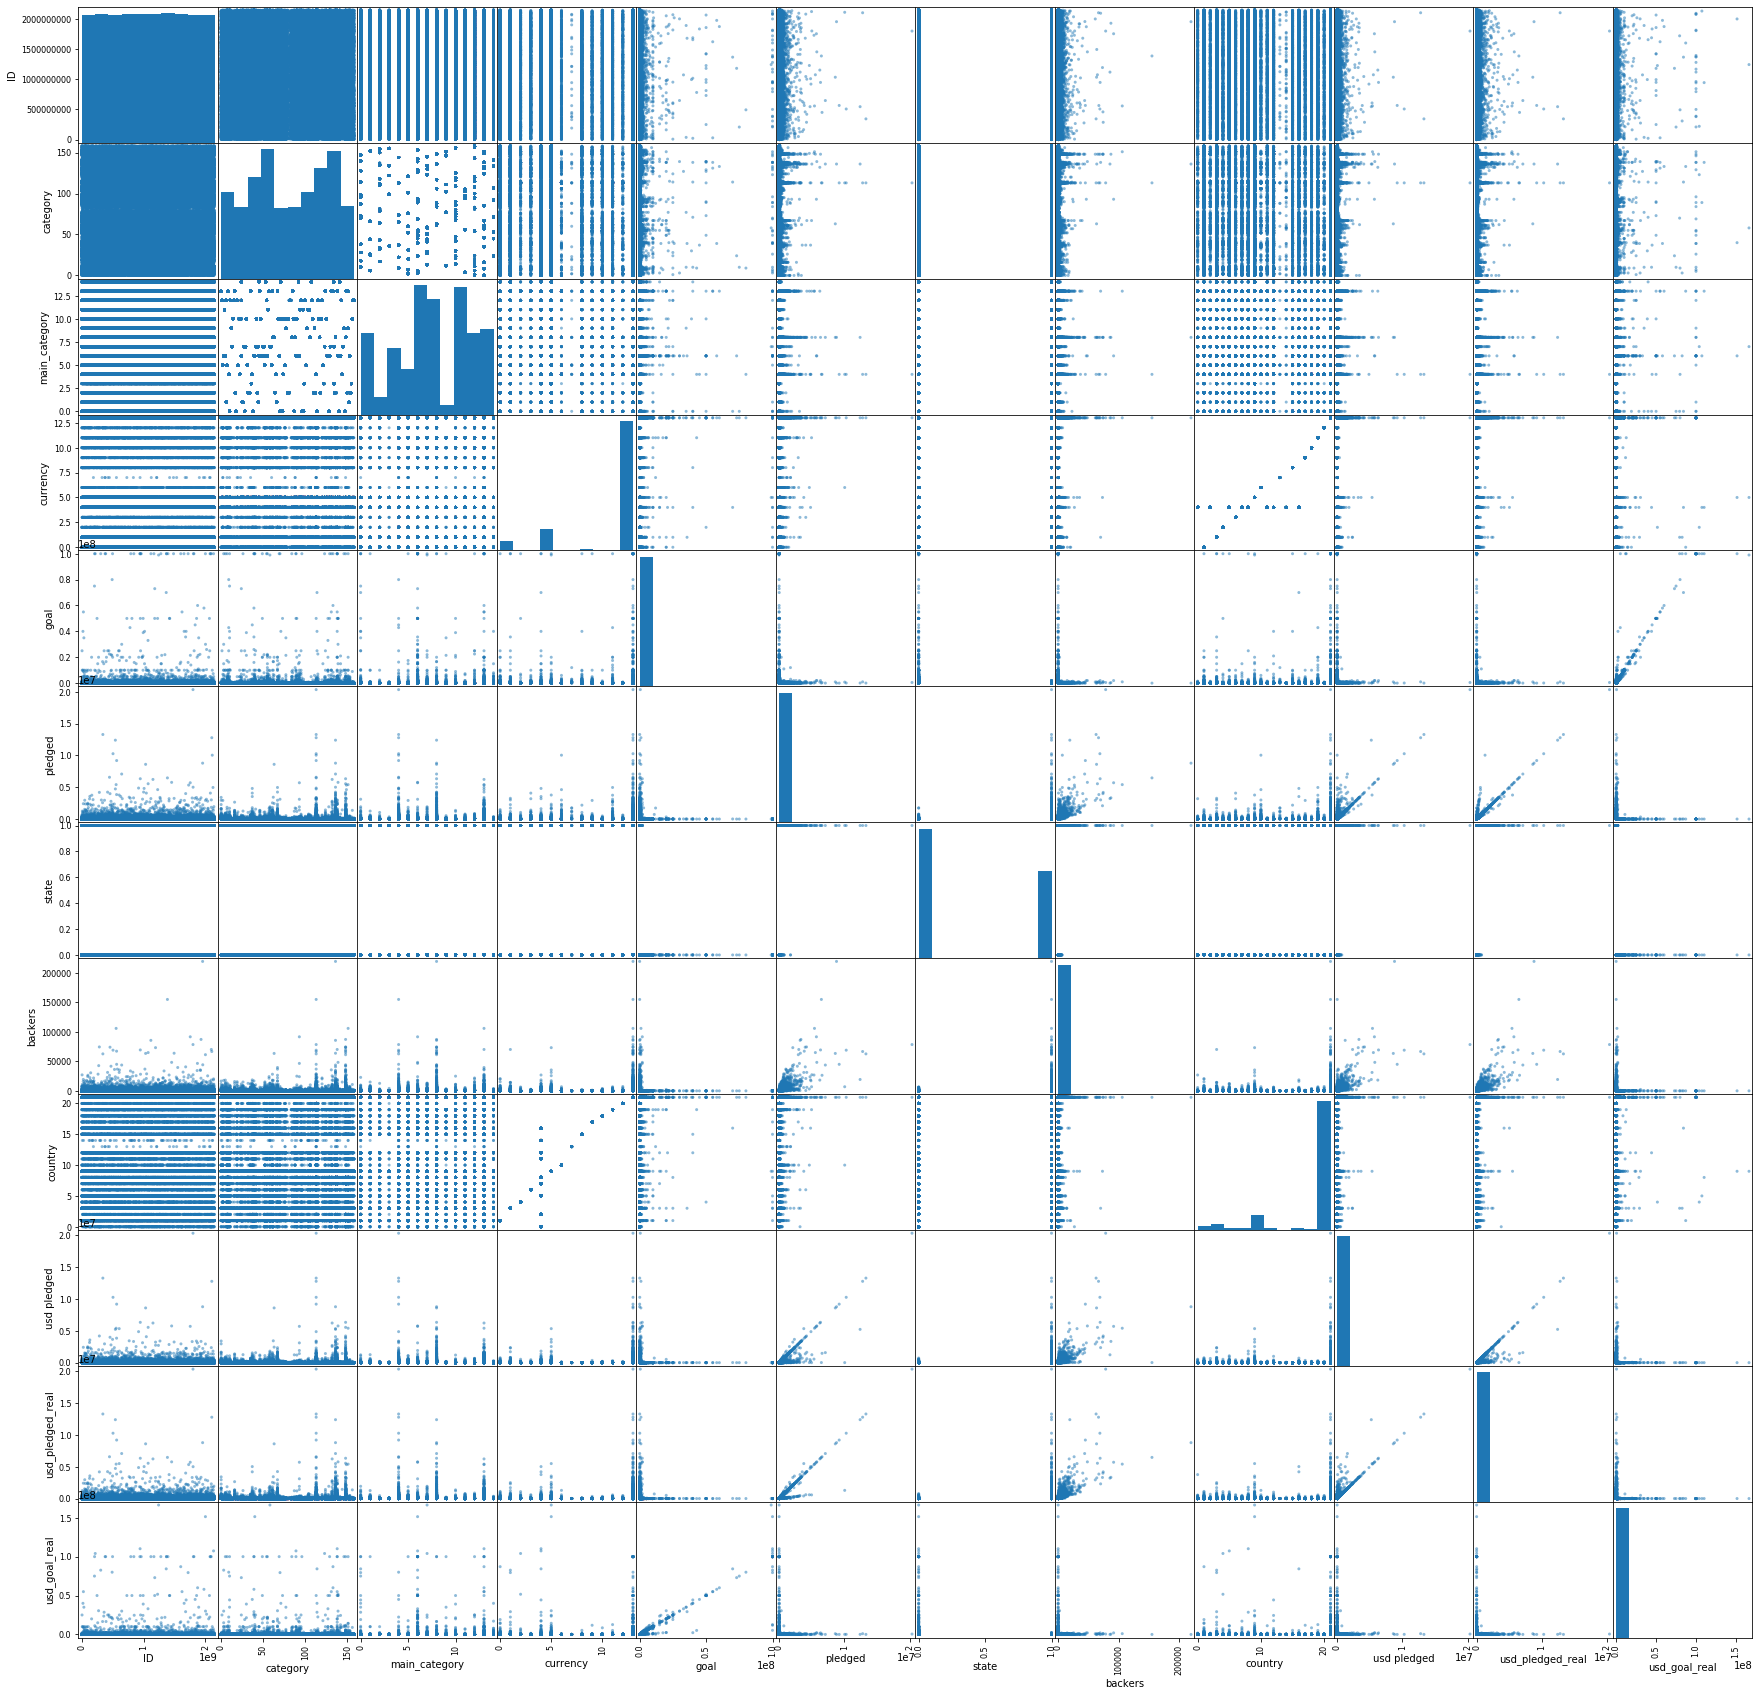

In [8]:
# まず、201801の散布図行列を書いてみる
pd.plotting.scatter_matrix(df_f18_SorF, figsize=(30,30))
plt.show()

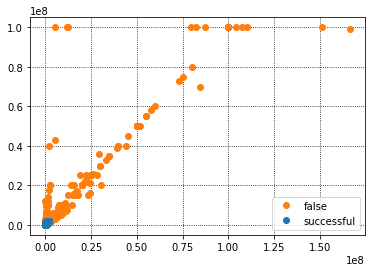

In [9]:
#成功と、失敗でデータを分ける。
df_f18_S = df_f18_SorF[df_f18_SorF['state']==1]
df_f18_F = df_f18_SorF[df_f18_SorF['state']==0]

#それぞれをプロットしてみる
plt.grid(which='major',color='black',linestyle=':')
plt.grid(which='minor',color='black',linestyle=':')
plt.plot(df_f18_F["usd_goal_real"], df_f18_F["goal"], 'o', color='C1', label='false')
plt.plot(df_f18_S["usd_goal_real"], df_f18_S["goal"], 'o', color='C0', label='successful')
plt.legend(loc='best')
plt.show()

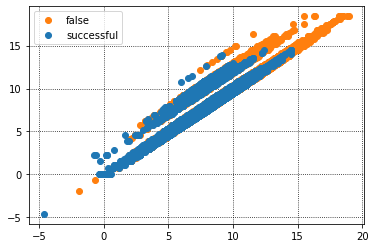

In [10]:
plt.grid(which='major',color='black',linestyle=':')
plt.grid(which='minor',color='black',linestyle=':')
plt.plot(np.log(df_f18_F["usd_goal_real"]), np.log(df_f18_F["goal"]), 'o', color='C1', label='false')
plt.plot(np.log(df_f18_S["usd_goal_real"]), np.log(df_f18_S["goal"]), 'o', color='C0', label='successful')
plt.legend(loc='best')
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

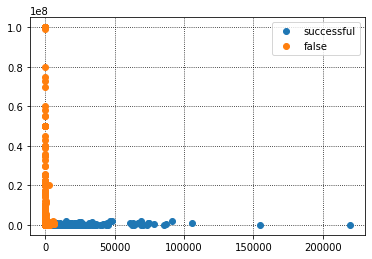

In [12]:
#成功と、失敗でデータを分ける。
df_f18_S = df_f18_SorF[df_f18_SorF['state']==1]
df_f18_F = df_f18_SorF[df_f18_SorF['state']==0]

#それぞれをプロットしてみる
plt.grid(which='major',color='black',linestyle=':')
plt.grid(which='minor',color='black',linestyle=':')
plt.plot(df_f18_S["backers"], df_f18_S["goal"], 'o', color='C0', label='successful')
plt.plot(df_f18_F["backers"], df_f18_F["goal"], 'o', color='C1', label='false')
plt.legend(loc='best')
plt.show

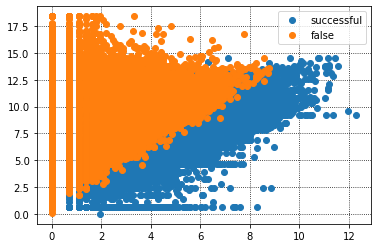

In [15]:
#Log(0)対策
delta=1

#「goal」、「backers」の対数の関係を見てみる。
plt.grid(which='major',color='black',linestyle=':')
plt.grid(which='minor',color='black',linestyle=':')
plt.plot(np.log(df_f18_S["backers"]+delta), np.log(df_f18_S["goal"]+delta), 'o', color='C0', label='successful')
plt.plot(np.log(df_f18_F["backers"]+delta), np.log(df_f18_F["goal"]+delta), 'o', color='C1', label='false')
plt.legend(loc='best')
plt.show()